In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt #для построения графиков
import seaborn as sns #для улучшенной визуализации поверх matplotlib

In [39]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

In [40]:
query = """
SELECT timestamp, numTrials, uid 
FROM checker 
WHERE status='ready' 
  AND labname='project1' 
  AND uid LIKE 'user_%'
ORDER BY uid, timestamp
"""
df = pd.read_sql(query, connection)
df

,timestamp,numTrials,uid
0,2020-05-14 20:56:08.898880,1,user_1
1,2020-05-14 20:58:02.313690,2,user_1
2,2020-05-14 20:58:46.322457,3,user_1
3,2020-05-14 21:08:15.434237,4,user_1
4,2020-05-14 21:10:14.867603,5,user_1
...,...,...,...
946,2020-05-14 16:18:00.528528,4,user_8
947,2020-05-14 16:41:03.916147,5,user_8
948,2020-05-14 17:40:47.781946,6,user_8
949,2020-05-14 17:46:54.469822,7,user_8


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #Преобразуем столбец timestamp из строкового формата в формат datetime для корректной работы с датами
df

,timestamp,numTrials,uid
0,2020-05-14 20:56:08.898880,1,user_1
1,2020-05-14 20:58:02.313690,2,user_1
2,2020-05-14 20:58:46.322457,3,user_1
3,2020-05-14 21:08:15.434237,4,user_1
4,2020-05-14 21:10:14.867603,5,user_1
...,...,...,...
946,2020-05-14 16:18:00.528528,4,user_8
947,2020-05-14 16:41:03.916147,5,user_8
948,2020-05-14 17:40:47.781946,6,user_8
949,2020-05-14 17:46:54.469822,7,user_8


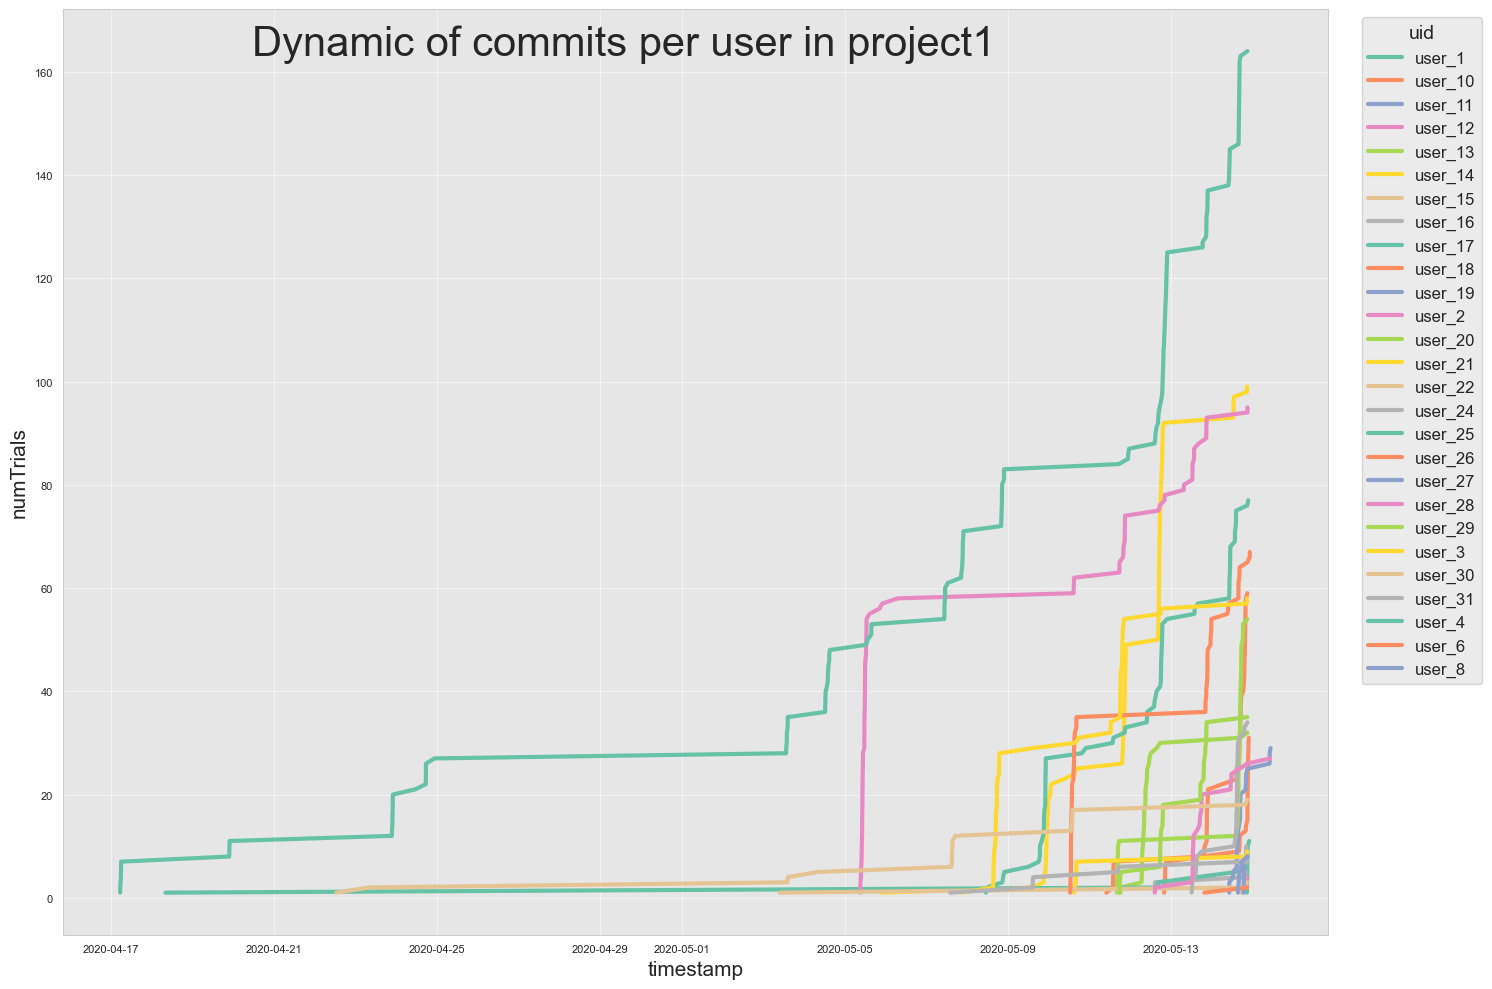

In [42]:
plt.figure(figsize=(15, 10)) 
sns.set_style("whitegrid", {
    "axes.facecolor": "0.9",
    "grid.color": "white"
})

ax = sns.lineplot(
    data=df, 
    x='timestamp', 
    y='numTrials', 
    hue='uid',
    linewidth=3,  
    palette='Set2'
)

ax.text(
    x=0.15,  
    y=0.95, 
    s='Dynamic of commits per user in project1',
    fontsize=30,
    transform=ax.transAxes,  
    bbox=dict(facecolor='none', edgecolor='none')  
)

plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)
plt.xticks( fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, alpha=0.5)

plt.legend(
    bbox_to_anchor=(1.02, 1), 
    loc='upper left',
    fontsize=12,
    title='uid',
    title_fontsize=14
)
plt.tight_layout()
plt.show()

## Какой пользователь лидировал по количеству коммитов почти всегда?

### Ответ: user_4 (Зеленая линия)

## Какой пользователь был лидером только короткий период времени?

### Ответ: user_2

In [43]:
connection.close()